<hr style="border:3px solid navy "> </hr>

<div align="center">
<div class="alert alert-info">


# Enhancing_Amazon_Review_Insights_through_NLP_Analysis
    

</div>
    
<hr style="border:3px solid navy "> </hr>

<hr style="border:3px solid maroon"> </hr>

<div class="alert alert-danger">

# Management Question:
    
"How can the implementation of the proposed comprehensive NLP approach, encompassing sentiment analysis, review summarization, clustering, and topic modeling, be strategically leveraged to optimize the decision-making process for both consumers and Amazon itself? 
    
Additionally, how can the integration of these NLP techniques contribute to improving user engagement, satisfaction, and overall shopping experiences within the Amazon ecosystem?"



    
</div>




<hr style="border:3px solid maroon"> </hr>

<hr style="border:3px solid maroon"> </hr>

<div class="alert alert-warning">

# Introduction:
    
This project employs Natural Language Processing (NLP) to analyze Amazon's 2018 review dataset, focusing on sentiment analysis, review summarization, clustering, and topic modeling. Leveraging a section of the  5-core subset of the dataset, pre-processing involves text cleaning, lowercasing, stopword removal, punctuation removal, tokenization, lemmatization, and stemming for enhanced analysis accuracy. Machine learning methods include sentiment analysis using CNN; product comparison through aggregate sentiment scores; review summarization using LSA, and  BERT, and word frequency-based techniques; and recommendation systems using TF_IDF etc.

Performance will be evaluated using metrics tailored to each task, such as accuracy, precision, recall, F1-Score, Mean Reciprocal Rank, NDCG, ROUGE Score, BLEU Score, precision-recall, MAP, and RMSE. The project's novelty lies in its comprehensive integration of multiple NLP techniques, providing users with a structured approach to explore Amazon products and enhancing their shopping experience.



    
</div>




<hr style="border:3px solid maroon"> </hr>

<div class="alert alert-info">

# Install & Import Libraries
    
</div>

In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [2]:
!pip install transformers scikit-learn
!pip install torch
!pip install sentence-transformers
!pip install gensim
!pip install seaborn
!pip install sumy
!pip install nltk
!pip install bert-extractive-summarizer
!pip install rouge-score
!pip install textblob
!pip install pytrec_eval
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=9b7284c39e56d6a2c31e6f891e3123212768a647c98b05c1f8cf94e3340e78a4
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 27.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=2169

<div class="alert alert-info">

# Load the Data
    
</div>

In [3]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Software.json.gz

--2023-11-24 15:43:51--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Software.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98221392 (94M) [application/x-gzip]
Saving to: ‘Software.json.gz’

Software.json.gz    100%[===================>]  93.67M  97.9MB/s    in 1.0s    

2023-11-24 15:43:52 (97.9 MB/s) - ‘Software.json.gz’ saved [98221392/98221392]



In [4]:
### load the data

data = []
with gzip.open('Software.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

459436
{'overall': 4.0, 'verified': True, 'reviewTime': '03 11, 2014', 'reviewerID': 'A240ORQ2LF9LUI', 'asin': '0077613252', 'style': {'Format:': ' Loose Leaf'}, 'reviewerName': 'Michelle W', 'reviewText': "The materials arrived early and were in excellent condition.  However for the money spent they really should've come with a binder and not just loose leaf.", 'summary': 'Material Great', 'unixReviewTime': 1394496000}


In [5]:
# convert list into pandas dataframe

df = pd.DataFrame.from_dict(data)

print(len(df))

459436


In [6]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Software.json.gz

--2023-11-24 15:44:01--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Software.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15240894 (15M) [application/x-gzip]
Saving to: ‘meta_Software.json.gz’

meta_Software.json. 100%[===================>]  14.53M  44.8MB/s    in 0.3s    

2023-11-24 15:44:01 (44.8 MB/s) - ‘meta_Software.json.gz’ saved [15240894/15240894]



In [7]:
### load the metadata

metadata = []
with gzip.open('meta_Software.json.gz') as f:
    for l in f:
        metadata.append(json.loads(l.strip()))

# total length of list, this number equals total number of products
print(len(metadata))

# first row of the list
display(metadata[0])


26790


{'category': [],
 'tech1': '',
 'description': [],
 'fit': '',
 'title': 'HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK CONCEPTS',
 'also_buy': [],
 'tech2': '',
 'brand': 'HOLT. RINEHART AND WINSTON',
 'feature': [],
 'rank': '25,550 in Software (',
 'also_view': [],
 'main_cat': 'Software',
 'similar_item': '',
 'date': '</div>',
 'price': '.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:1

In [8]:
# Display the first few elements to inspect the structure
print(metadata[:5])  # Display the first 5 elements

# If it's a list of dictionaries, you can print the keys of the first element
if metadata:
    if isinstance(metadata[0], dict):
        display("Keys of the first element:", metadata[0].keys())


[{'category': [], 'tech1': '', 'description': [], 'fit': '', 'title': 'HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK CONCEPTS', 'also_buy': [], 'tech2': '', 'brand': 'HOLT. RINEHART AND WINSTON', 'feature': [], 'rank': '25,550 in Software (', 'also_view': [], 'main_cat': 'Software', 'similar_item': '', 'date': '</div>', 'price': '.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:100px;margin-b

'Keys of the first element:'

dict_keys(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes'])

In [9]:
print("Keys in data:", data[0].keys())
print("Keys in metadata:", metadata[0].keys())

Keys in data: dict_keys(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime'])
Keys in metadata: dict_keys(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes'])


we found the column ' asin' to be common key in both the files.

<div class="alert alert-info">

# 1. Exploratory Data Analysis
    
</div>

In [10]:
# Create a dictionary for quick lookup of metadata based on 'asin'
metadata_dict = {item['asin']: item for item in metadata}

# Perform the join
joined_data = []
for record in data:
    asin_key = record['asin']
    if asin_key in metadata_dict:
        # If 'asin' exists in metadata, add metadata information to the record
        record.update(metadata_dict[asin_key])
        joined_data.append(record)

# Convert the list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(joined_data)

# Print the DataFrame
display(df)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,vote,image,details
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,...,[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,...,[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,...,[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,7,NaN,NaN
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,...,[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,3,NaN,NaN
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,...,[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459045,2.0,True,"11 29, 2016",AGEWYJ2NF5C2H,B01HF41TKI,NaN,Bonita Alferes,No instructions.....No Help unless you want to...,Two Stars,1480377600,...,[],Software,,</div>,$24.39,[],[],NaN,NaN,"{'Shipping Weight:': '1.3 pounds', 'ASIN:': 'B..."
459046,1.0,True,"03 1, 2018",A3VCFV8WEQG9R5,B01HF3G4BS,NaN,mekonen,it's a joke,One Star,1519862400,...,"[B01MF5MTWP, B015724B8M, B07CYFFH4H, B07CY54KL...",Software,,</div>,$39.99,[],[],NaN,NaN,"{'Downloading:': 'Currently, this item is avai..."
459047,5.0,True,"12 2, 2017",A3DXGHJF6SOHNC,B01HF3G4BS,NaN,bbeckham,I have multiple licenses of the Antivirus. I h...,This is very effective antivirus software.,1512172800,...,"[B01MF5MTWP, B015724B8M, B07CYFFH4H, B07CY54KL...",Software,,</div>,$39.99,[],[],NaN,NaN,"{'Downloading:': 'Currently, this item is avai..."
459048,5.0,True,"09 15, 2018",A1WOS4D7QA06DO,B01HJAMWOK,NaN,Charles E. Potter,good value,Five Stars,1536969600,...,"[B01FBH8Q0C, B06XMXH44C, B00B7AUJC6, B0755P7LY...",Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,"{'Shipping Weight:': '6.1 ounces', 'ASIN:': 'B..."


In [11]:
df.describe()

,overall,unixReviewTime
count,459050.000000,4.590500e+05
mean,3.570413,1.369726e+09
std,1.626599,1.150244e+08
min,1.000000,9.127296e+08
25%,2.000000,1.322438e+09
50%,4.000000,1.405814e+09
75%,5.000000,1.448323e+09
max,5.000000,1.538438e+09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459050 entries, 0 to 459049
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   overall          459050 non-null  float64
 1   verified         459050 non-null  bool   
 2   reviewTime       459050 non-null  object 
 3   reviewerID       459050 non-null  object 
 4   asin             459050 non-null  object 
 5   style            234292 non-null  object 
 6   reviewerName     459026 non-null  object 
 7   reviewText       458984 non-null  object 
 8   summary          458994 non-null  object 
 9   unixReviewTime   459050 non-null  int64  
 10  category         459050 non-null  object 
 11  tech1            459050 non-null  object 
 12  description      459050 non-null  object 
 13  fit              459050 non-null  object 
 14  title            459050 non-null  object 
 15  also_buy         459050 non-null  object 
 16  tech2            459050 non-null  obje

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df
# If not, you can load your data and create the DataFrame using the provided code in the previous response

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
display(df.head())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())

First few rows of the DataFrame:


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,vote,image,details
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,...,[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,...,[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,...,[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,7,NaN,NaN
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,...,[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,3,NaN,NaN
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,...,[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN



Summary Statistics:
             overall  unixReviewTime
count  459050.000000    4.590500e+05
mean        3.570413    1.369726e+09
std         1.626599    1.150244e+08
min         1.000000    9.127296e+08
25%         2.000000    1.322438e+09
50%         4.000000    1.405814e+09
75%         5.000000    1.448323e+09
max         5.000000    1.538438e+09

Missing Values:


overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              224758
reviewerName           24
reviewText             66
summary                56
unixReviewTime          0
category                0
tech1                   0
description             0
fit                     0
title                   0
also_buy                0
tech2                   0
brand                   0
feature                 0
rank                    0
also_view               0
main_cat                0
similar_item            0
date                    0
price                   0
imageURL                0
imageURLHighRes         0
vote               331400
image              457545
details              5245
dtype: int64

#### Created a copy of DataFrame to avoid loss of data

In [14]:
df_copy = df.copy()
df_copy = df_copy.drop(['style', 'vote', 'image'], axis=1)

# Display the first few rows of the Dataframe without Missing values
print("First few rows of the DataFrame:")
display(df_copy.head())

# Summary statistics
print("\nSummary Statistics:")
print(df_copy.describe())

First few rows of the DataFrame:


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,[],...,[],"15,675 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,[],...,[],"15,675 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,[],...,[],"15,675 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,[],...,[],"15,675 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,[],...,[],"9,130 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN



Summary Statistics:
             overall  unixReviewTime
count  459050.000000    4.590500e+05
mean        3.570413    1.369726e+09
std         1.626599    1.150244e+08
min         1.000000    9.127296e+08
25%         2.000000    1.322438e+09
50%         4.000000    1.405814e+09
75%         5.000000    1.448323e+09
max         5.000000    1.538438e+09


In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459050 entries, 0 to 459049
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   overall          459050 non-null  float64
 1   verified         459050 non-null  bool   
 2   reviewTime       459050 non-null  object 
 3   reviewerID       459050 non-null  object 
 4   asin             459050 non-null  object 
 5   reviewerName     459026 non-null  object 
 6   reviewText       458984 non-null  object 
 7   summary          458994 non-null  object 
 8   unixReviewTime   459050 non-null  int64  
 9   category         459050 non-null  object 
 10  tech1            459050 non-null  object 
 11  description      459050 non-null  object 
 12  fit              459050 non-null  object 
 13  title            459050 non-null  object 
 14  also_buy         459050 non-null  object 
 15  tech2            459050 non-null  object 
 16  brand            459050 non-null  obje

In [16]:
display(df_copy.head(10))

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,[],...,[],"15,675 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,[],...,[],"15,675 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,[],...,[],"15,675 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,[],...,[],"15,675 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,[],...,[],"9,130 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
5,4.0,True,"08 15, 2011",AGN3T5ERYJN5A,0132147556,Skipper management,"Strong backgroung, good read, quite up to date...",E-marketing 6th ed,1313366400,"[Software, Business &amp; Office, Business &am...",...,[],"1,592,058 in Books (","[0132953447, 1616100982]",Books,,,,[],[],NaN
6,3.0,False,"10 9, 2010",AHPK2GD0SQC59,0132147556,dstmars,If you live on Mars and never heard of the int...,Mars calling Earth....what is internet?,1286582400,"[Software, Business &amp; Office, Business &am...",...,[],"1,592,058 in Books (","[0132953447, 1616100982]",Books,,,,[],[],NaN
7,5.0,False,"10 3, 2010",A35UC8LHA6TILH,0132147556,Knw1989,i got this book on amazon and it ended up savi...,"good book, saved me a lot of money",1286064000,"[Software, Business &amp; Office, Business &am...",...,[],"1,592,058 in Books (","[0132953447, 1616100982]",Books,,,,[],[],NaN
8,5.0,True,"10 3, 2010",A2IH0AJPR7IWG3,0132147556,Tam,I was very happy with this purchase because th...,Super fast,1286064000,"[Software, Business &amp; Office, Business &am...",...,[],"1,592,058 in Books (","[0132953447, 1616100982]",Books,,,,[],[],NaN
9,5.0,True,"05 23, 2010",AL87GELNJGOH3,0132147556,R. Rowley,Recieved in a timely manner- book in great con...,E-Marketing,1274572800,"[Software, Business &amp; Office, Business &am...",...,[],"1,592,058 in Books (","[0132953447, 1616100982]",Books,,,,[],[],NaN


### Distributions

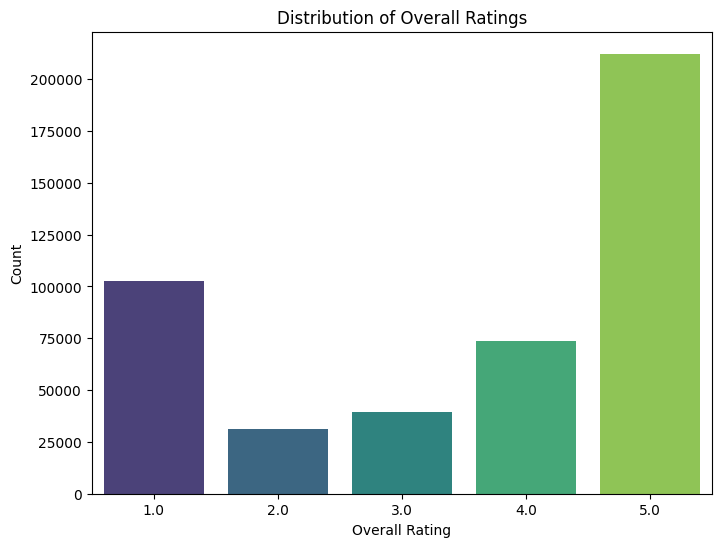

In [17]:
# Distribution of Overall Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df_copy, palette='viridis')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()




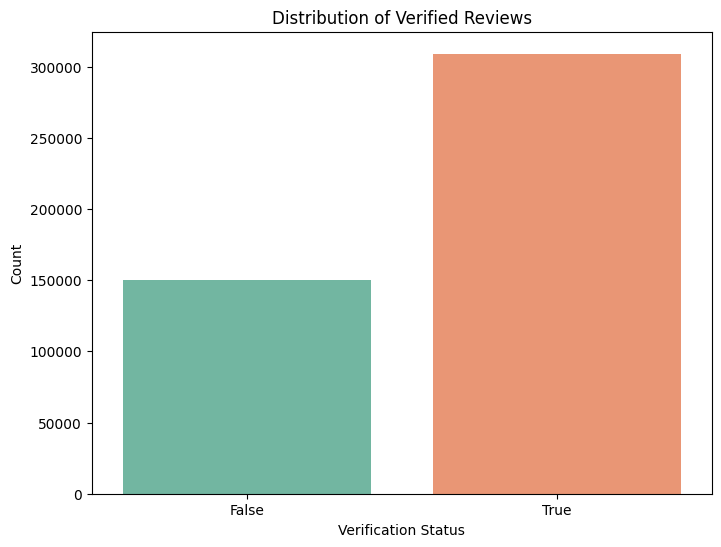

In [18]:
# Distribution of Verified Reviews
plt.figure(figsize=(8, 6))
sns.countplot(x='verified', data=df_copy, palette='Set2')
plt.title('Distribution of Verified Reviews')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()



### Handle missing values

In [19]:
# Handle missing values in 'reviewText' and create a new column 'review_length'
df_copy['review_length'] = df_copy['reviewText'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)


In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459050 entries, 0 to 459049
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   overall          459050 non-null  float64
 1   verified         459050 non-null  bool   
 2   reviewTime       459050 non-null  object 
 3   reviewerID       459050 non-null  object 
 4   asin             459050 non-null  object 
 5   reviewerName     459026 non-null  object 
 6   reviewText       458984 non-null  object 
 7   summary          458994 non-null  object 
 8   unixReviewTime   459050 non-null  int64  
 9   category         459050 non-null  object 
 10  tech1            459050 non-null  object 
 11  description      459050 non-null  object 
 12  fit              459050 non-null  object 
 13  title            459050 non-null  object 
 14  also_buy         459050 non-null  object 
 15  tech2            459050 non-null  object 
 16  brand            459050 non-null  obje

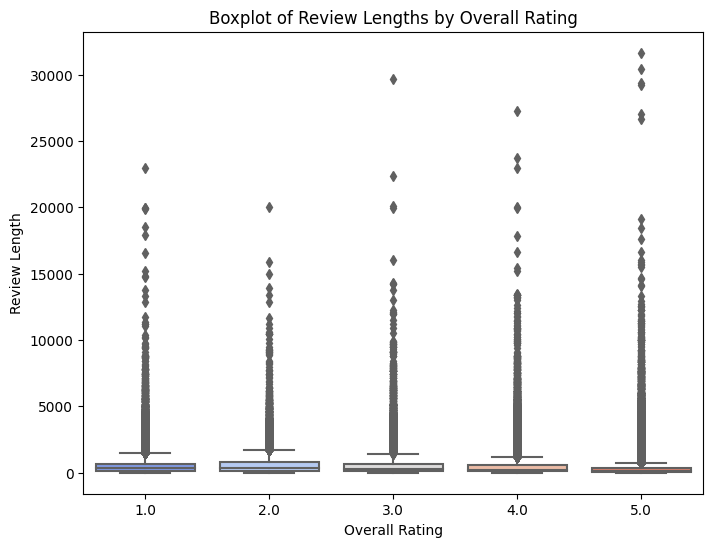

In [21]:
# Boxplot of Review Lengths
plt.figure(figsize=(8, 6))
sns.boxplot(x='overall', y='review_length', data=df_copy, palette='coolwarm')
plt.title('Boxplot of Review Lengths by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Review Length')
plt.show()



### Outlier Detection and Handling

In [22]:
# Calculate IQR for 'review_length'
Q1 = df_copy['review_length'].quantile(0.25)
Q3 = df_copy['review_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the acceptable range for 'review_length'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the acceptable range
df_no_outliers = df_copy[(df_copy['review_length'] >= lower_bound) & (df_copy['review_length'] <= upper_bound)]

# Display the DataFrame without outliers
print("Original DataFrame shape:", df_copy.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Original DataFrame shape: (459050, 28)
DataFrame shape after removing outliers: (420682, 28)


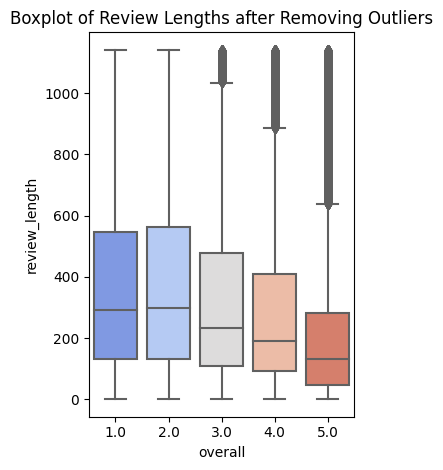

In [23]:
# Boxplot of Review Lengths after Removing Outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='overall', y='review_length', data=df_no_outliers, palette='coolwarm')
plt.title('Boxplot of Review Lengths after Removing Outliers')

plt.tight_layout()
plt.show()

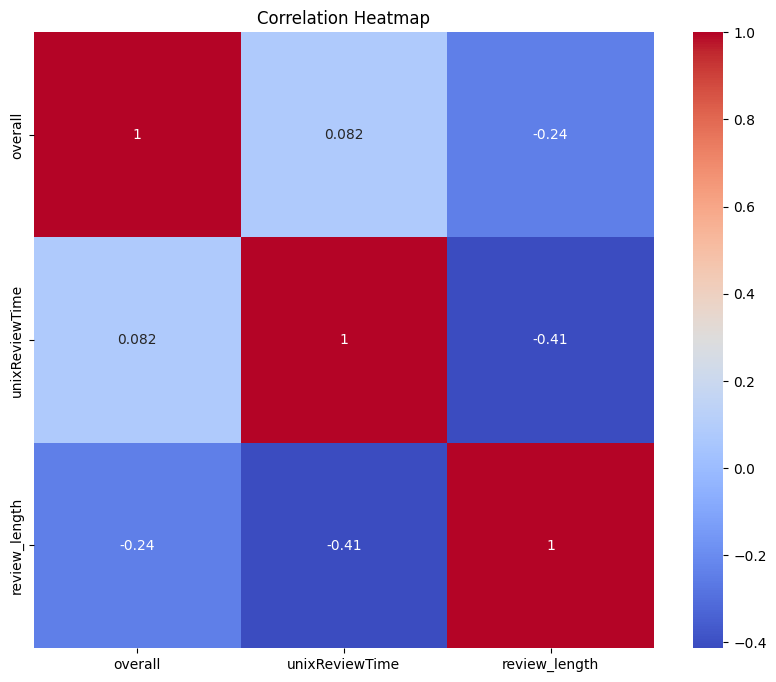

In [24]:
numeric_df = df_no_outliers.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()


<div class="alert alert-info">

# 2. Pre-Processing the Data
    
</div>

We perform standard text preprocessing steps like lowercasing, removal of HTML tags,punctuations,stopwords and Lemmatization and  Tokenization.

In [25]:
import pandas as pd
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

# Download the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Specify the columns you want to preprocess for sentiment analysis
selected_columns = ['reviewText', 'summary']

# Function for text preprocessing
def preprocess_text(text):
    # Check if the value is NaN
    if pd.isnull(text):
        return ""

    # Lowercasing
    text = text.lower()

    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply preprocessing to the selected columns in the copied DataFrame
for column in selected_columns:
    df_no_outliers[f'processed_{column}'] = df_no_outliers[column].apply(preprocess_text)

# Display the processed DataFrame with the selected columns
display(df_no_outliers[selected_columns + [f'processed_{column}' for column in selected_columns]])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-25-d2310a0fd9aa>:27: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
<ipython-input-25-d2310a0fd9aa>:27: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
<ipython-input-25-d2310a0fd9aa>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,reviewText,summary,processed_reviewText,processed_summary
0,The materials arrived early and were in excell...,Material Great,material arrived early excellent condition how...,material great
1,I am really enjoying this book with the worksh...,Health,really enjoying book worksheet make review goa...,health
2,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,taking class '' waste money called book 140.00...,kiding
3,This book was missing pages!!! Important pages...,missing pages!!,book missing page important page could n't ans...,missing page
4,I have used LearnSmart and can officially say ...,Best study product out there!,used learnsmart officially say amazing study t...,best study product
...,...,...,...,...
459045,No instructions.....No Help unless you want to...,Two Stars,instruction ..... help unless want pay help,two star
459046,it's a joke,One Star,'s joke,one star
459047,I have multiple licenses of the Antivirus. I h...,This is very effective antivirus software.,multiple license antivirus using 2 year found ...,effective antivirus software
459048,good value,Five Stars,good value,five star


<div class="alert alert-info">

 # 3. Sentiment Analysis
    
</div>

### CNN Based Sentiment Analysis

In [26]:
import pandas as pd

# Assuming 'df_no_outliers' is your DataFrame without outliers
df_no_outliers['sentiment'] = df_no_outliers['overall'].apply(lambda x: 'negative' if x <= 3 else 'positive')

# Display the updated DataFrame
display(df_no_outliers[['overall', 'sentiment']])


<ipython-input-26-cfa0f731207f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['sentiment'] = df_no_outliers['overall'].apply(lambda x: 'negative' if x <= 3 else 'positive')


,overall,sentiment
0,4.0,positive
1,4.0,positive
2,1.0,negative
3,3.0,negative
4,5.0,positive
...,...,...
459045,2.0,negative
459046,1.0,negative
459047,5.0,positive
459048,5.0,positive


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Load your DataFrame with 'reviewText' and 'ground_truth' columns
# Assuming 'df_no_outliers' is your DataFrame without outliers
df = df_no_outliers[['reviewText', 'sentiment']]

# Handle missing values in 'reviewText'
df['reviewText'] = df['reviewText'].fillna('')  # Replace NaN with an empty string

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['reviewText'])
train_sequences = tokenizer.texts_to_sequences(train_data['reviewText'])
test_sequences = tokenizer.texts_to_sequences(test_data['reviewText'])
X_train = pad_sequences(train_sequences, maxlen=max_len)
X_test = pad_sequences(test_sequences, maxlen=max_len)

# Map 'positive' to 1 and 'negative' to 0
y_train = train_data['sentiment'].map({'positive': 1, 'negative': 0}).values
y_test = test_data['sentiment'].map({'positive': 1, 'negative': 0}).values

# Build a simple CNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
model.add(Conv1D(32, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


<ipython-input-27-83d3cb978e61>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].fillna('')  # Replace NaN with an empty string


Epoch 1/10
2104/2104 [==============================] - 69s 28ms/step - loss: 0.3166 - accuracy: 0.8614 - val_loss: 0.2661 - val_accuracy: 0.8917
Epoch 2/10
2104/2104 [==============================] - 15s 7ms/step - loss: 0.2432 - accuracy: 0.9020 - val_loss: 0.2523 - val_accuracy: 0.8985
Epoch 3/10
2104/2104 [==============================] - 11s 5ms/step - loss: 0.2172 - accuracy: 0.9146 - val_loss: 0.2488 - val_accuracy: 0.9013
Epoch 4/10
2104/2104 [==============================] - 10s 5ms/step - loss: 0.1965 - accuracy: 0.9241 - val_loss: 0.2512 - val_accuracy: 0.9005
Epoch 5/10
2104/2104 [==============================] - 10s 5ms/step - loss: 0.1782 - accuracy: 0.9329 - val_loss: 0.2566 - val_accuracy: 0.8990
Epoch 6/10
2104/2104 [==============================] - 10s 5ms/step - loss: 0.1611 - accuracy: 0.9409 - val_loss: 0.2700 - val_accuracy: 0.8963
Epoch 7/10
2104/2104 [==============================] - 9s 4ms/step - loss: 0.1450 - accuracy: 0.9483 - val_loss: 0.2807 - val_ac

#### CNN Sentiment Analysis Metrics

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict sentiments on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Convert back to 'positive' and 'negative' labels
y_pred_labels = ['positive' if pred == 1 else 'negative' for pred in y_pred]

# Evaluate metrics
accuracy = accuracy_score(test_data['sentiment'], y_pred_labels)
precision = precision_score(test_data['sentiment'], y_pred_labels, pos_label='positive')
recall = recall_score(test_data['sentiment'], y_pred_labels, pos_label='positive')
f1 = f1_score(test_data['sentiment'], y_pred_labels, pos_label='positive')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



2630/2630 [==============================] - 4s 1ms/step
Accuracy: 0.8906188716022677
Precision: 0.9065062975981254
Recall: 0.9236006192527931
F1 Score: 0.9149736226983379


<div class="alert alert-warning">
The model achieved an accuracy of 89.06%, demonstrating its overall correctness. With a precision of 90.65%, it correctly identified positive instances, while a recall of 92.36% indicates its ability to capture the majority of actual positive cases. The F1 Score of 91.50% signifies a balanced performance between precision and recall in classification.
</div>


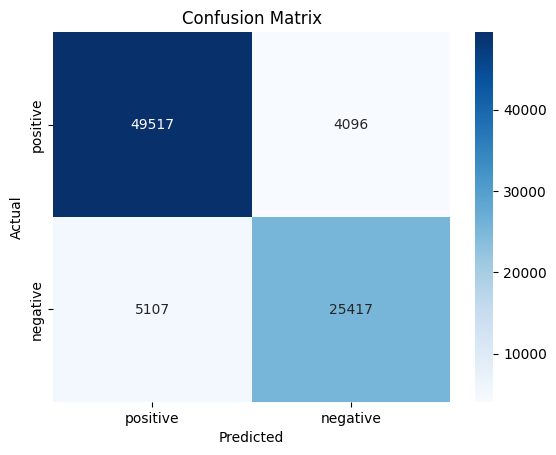

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
conf_matrix = confusion_matrix(test_data['sentiment'], y_pred_labels, labels=['positive', 'negative'])

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


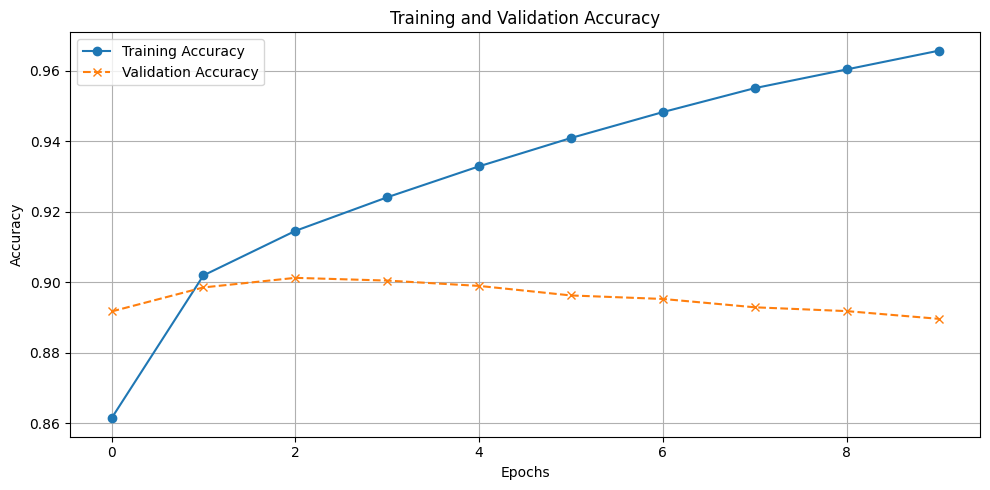

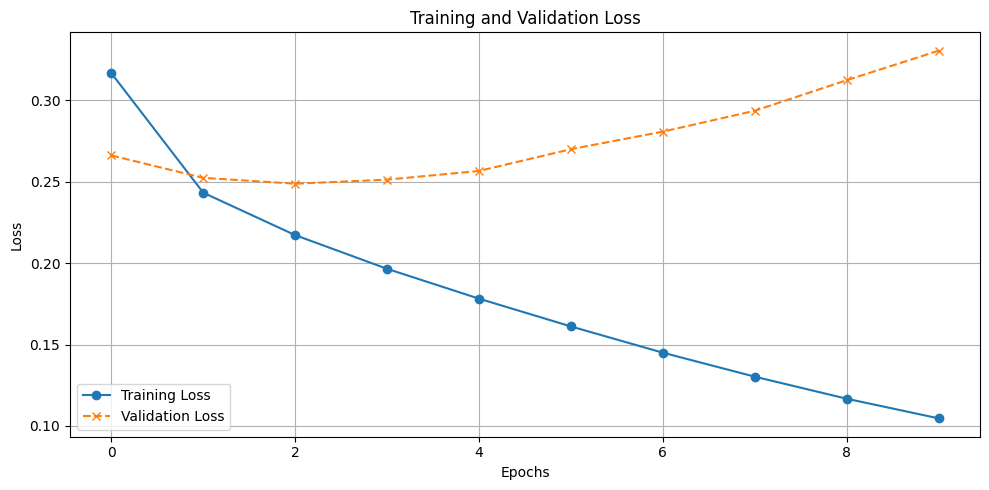

In [30]:
import matplotlib.pyplot as plt

# Plot training history: Accuracy
plt.figure(figsize=(10, 5))

plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x', linestyle='--')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training history: Loss
plt.figure(figsize=(10, 5))

plt.plot(history.history['loss'], label='Training Loss', marker='o', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x', linestyle='--')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



<div class="alert alert-info">

 # 4. Review Summarization
    
</div>

To filter down the data, we have taken only the data of 'antivirus' products. We used concepts like **Clustering** and **Topic modeling** for the further analysis.

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Assuming you have a DataFrame named df_no_outliers containing 'reviewText' column
# Filter reviews related to "antivirus"
antivirus_reviews = df_no_outliers[df_no_outliers['reviewText'].str.contains('antivirus', case=False, na=False)]

# Step 1: Clustering (K-Means)
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(antivirus_reviews['reviewText'])
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
antivirus_reviews['cluster_label'] = kmeans.fit_predict(tfidf_matrix)

# Step 2: Topic Modeling (LDA) within each cluster
topic_summaries = {}
for cluster in range(num_clusters):
    cluster_reviews = antivirus_reviews[antivirus_reviews['cluster_label'] == cluster]

    # Tokenize and create a Gensim Dictionary
    tokenized_reviews = [review.split() for review in cluster_reviews['reviewText']]
    dictionary = Dictionary(tokenized_reviews)

    # Create a Gensim Corpus
    corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_reviews]

    # Perform LDA topic modeling
    lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

    # Get topic terms
    topic_terms = [lda_model.show_topic(topic, topn=5) for topic in range(lda_model.num_topics)]

    # Store topic summaries
    topic_summaries[cluster] = {'topic_terms': topic_terms, 'cluster_reviews': cluster_reviews}

# Display topic summaries
for cluster, summary in topic_summaries.items():
    print(f"\nCluster {cluster} Topic Summaries:")
    for topic, terms in enumerate(summary['topic_terms']):
        print(f"Topic {topic + 1}: {', '.join([term[0] for term in terms])}")

    # Display a few reviews from the cluster
    print("\nSample Reviews:")
    print(summary['cluster_reviews']['reviewText'].head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-31-de7bed1acb10>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  antivirus_reviews['cluster_label'] = kmeans.fit_predict(tfidf_matrix)



Cluster 0 Topic Summaries:
Topic 1: antivirus, Good, good, very, is
Topic 2: good, a, antivirus,, A, Antivirus
Topic 3: good, a, antivirus, is, it

Sample Reviews:
73353     Good to have Norton on machines, a good anti v...
94835                                   very good antivirus
102240                     A good antivirus-malware program
115262    good product, it was what I needed. The protec...
122859    I have bought this second year in a row-- did ...
Name: reviewText, dtype: object

Cluster 1 Topic Summaries:
Topic 1: I, the, and, to, a
Topic 2: the, to, and, I, a
Topic 3: THE, NOT, A, THIS, I

Sample Reviews:
3547    I was debating between Norton AntiVirus Softwa...
4051    2000 Professional is relatively stable.  It is...
6276    Scheduling function not exactly foolproof.\nI'...
7555    McAfee is the best antivirus! It beats all oth...
7556    Installed it on my XP system; updated it while...
Name: reviewText, dtype: object

Cluster 2 Topic Summaries:
Topic 1: antivirus, th

### Review Summarization using Latent Semantic Analysis (LSA)

In [32]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# Assuming you have the product_summaries dictionary from the previous block
# Product Review Summaries
product_summaries = {}

for asin_id, reviews in topic_summaries.items():
    # Combine reviews into one text
    combined_reviews = ' '.join(reviews['cluster_reviews']['reviewText'])

    # Summarize the combined reviews using LSA Summarizer
    parser = PlaintextParser.from_string(combined_reviews, Tokenizer("english"))
    summarizer = LsaSummarizer()

    # Limit the number of sentences in the summary
    summary_sentences = list(summarizer(parser.document, sentences_count=5))  # You can adjust the number of sentences as needed

    # Combine the summary sentences into one string
    summary = ' '.join(str(sentence) for sentence in summary_sentences)

    # Store the product summary
    product_summaries[asin_id] = {'combined_reviews': combined_reviews, 'summary': summary}

# Display product summaries
for asin_id, summary in product_summaries.items():
    print(f"\nProduct {asin_id} Summary:")
    print(f"\n\n\nSummarized Review: {summary['summary']}")


/usr/local/lib/python3.10/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (10529) is lower than number of sentences (24238). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))



Product 0 Summary:



Summarized Review: I have bought this second year in a row-- did some research and found that this is as good as any at a good price beware of sales pitches by others -- this is a good antivirus-- This antivirus is good and it does not hog up so much memory like other antivirus software. This is a very good antivirus program I know with it being McAfee that it comes with a good support team and I know my computer is well protected, No good..i do better with free antivirus. It was pretty good, no hassle with the install and pretty good for the price, would recommend to anyone who's looking for an antivirus! This is a totally dependable, free antivirus that's so good, they even use it where I work! I have used the free edition for a couple of years now and had good results with it.

Product 1 Summary:



Summarized Review: I wouldn't mind, if there was _anything_ visually appealing about what is making my system drag its feet, but sadly all these bell-n-whistles si

#### Metrics for LSA Summarization

In [33]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from rouge_score import rouge_scorer

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Lists to store reference and hypothesis summaries
reference_summaries = []
hypothesis_summaries = []

# Assuming you have the product_summaries dictionary from the previous LSA-based summarization block
for asin_id, reviews in topic_summaries.items():
    # Reference summary for comparison (combined reviews within the cluster)
    reference_summary = ' '.join(reviews['cluster_reviews']['reviewText'])
    reference_summaries.append(reference_summary)

    # Summarize the combined reviews using LSA Summarizer
    parser = PlaintextParser.from_string(reference_summary, Tokenizer("english"))
    summarizer = LsaSummarizer()

    # Limit the number of sentences in the summary
    summary_sentences = list(summarizer(parser.document, sentences_count=5))  # Adjust the number of sentences as needed

    # Combine the summary sentences into one string
    hypothesis_summary = ' '.join(str(sentence) for sentence in summary_sentences)
    hypothesis_summaries.append(hypothesis_summary)

# Convert lists to strings
reference_text = ' '.join(reference_summaries)
hypothesis_text = ' '.join(hypothesis_summaries)

# Calculate ROUGE scores
scores = scorer.score(reference_text, hypothesis_text)

# Display ROUGE scores
print("\nROUGE Scores for LSA-based Summarization:")
print(f"ROUGE-1 Precision: {scores['rouge1'].precision}")
print(f"ROUGE-1 Recall: {scores['rouge1'].recall}")
print(f"ROUGE-1 F1 Score: {scores['rouge1'].fmeasure}")
print(f"ROUGE-2 Precision: {scores['rouge2'].precision}")
print(f"ROUGE-2 Recall: {scores['rouge2'].recall}")
print(f"ROUGE-2 F1 Score: {scores['rouge2'].fmeasure}")
print(f"ROUGE-L Precision: {scores['rougeL'].precision}")
print(f"ROUGE-L Recall: {scores['rougeL'].recall}")
print(f"ROUGE-L F1 Score: {scores['rougeL'].fmeasure}")



ROUGE Scores for LSA-based Summarization:
ROUGE-1 Precision: 1.0
ROUGE-1 Recall: 0.0020088013752747437
ROUGE-1 F1 Score: 0.004009548364281089
ROUGE-2 Precision: 0.9904534606205251
ROUGE-2 Recall: 0.0019872576084432113
ROUGE-2 F1 Score: 0.003966556670386309
ROUGE-L Precision: 1.0
ROUGE-L Recall: 0.0020088013752747437
ROUGE-L F1 Score: 0.004009548364281089


<div class="alert alert-warning">

The LSA-based summarization exhibits perfect precision (1.0) for ROUGE-1 and ROUGE-L, indicating that all generated n-grams are present in the reference summaries. However, the recall is extremely low (0.2%) for both ROUGE-1 and ROUGE-L, resulting in low F1 Scores (0.4%), implying that the summarization method struggles to capture the entirety of important information from the source text. The pattern repeats in ROUGE-2 metrics, with high precision (99.0%) but minimal recall (0.2%) and consequently low F1 Score (0.4%).
    
</div>


### Review Summarization using BERT

In [34]:
from transformers import pipeline

# Load the summarization pipeline
summarizer = pipeline("summarization")

# Assuming you have the product_summaries dictionary from the previous block
# Product Review Summaries
product_summaries_bert = {}

# Display available product indices
product_indices = list(topic_summaries.keys())
print("Available Product Indices:", product_indices)

# Get user input for the desired product index
selected_product_index = int(input("Enter the product index you want to view (e.g., 0, 1, 2, ...): "))

# Check if the selected index is valid
if selected_product_index in product_indices:
    # Retrieve reviews and summary for the selected product index
    reviews = topic_summaries[selected_product_index]['cluster_reviews']['reviewText']
    combined_reviews = ' '.join(reviews)

    # Split the combined reviews into chunks of suitable length
    max_chunk_length = 512  # Adjust as needed based on the model's maximum sequence length
    chunks = [combined_reviews[i:i + max_chunk_length] for i in range(0, len(combined_reviews), max_chunk_length)]

    # Summarize each chunk separately
    summary_chunks = []
    for chunk in chunks:
        summary = summarizer(chunk, max_length=100, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)
        summary_text = summary[0]['summary_text'] if 'summary_text' in summary[0] else summary[0]['summary']
        summary_chunks.append(summary_text)

    # Combine the summaries of chunks into one summary
    summary = ' '.join(summary_chunks)


    # Store the product summary
    product_summaries_bert[selected_product_index] = {'combined_reviews': combined_reviews, 'summary': summary}

    # Display product summary
    print(f"\nProduct {selected_product_index} Summary:")
    print(f"\n\n\n\nCombined Reviews: {product_summaries_bert[selected_product_index]['combined_reviews']}")
    print(f"\n\n\n\n\nSummarized Review: {product_summaries_bert[selected_product_index]['summary']}")
else:
    print("Invalid product index. Please select a valid index.")


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Available Product Indices: [0, 1, 2, 3, 4]
Enter the product index you want to view (e.g., 0, 1, 2, ...): 0

Product 0 Summary:




Combined Reviews: Good to have Norton on machines, a good anti virus software..
It is always good to have an antivirus software in your machines... very good antivirus A good antivirus-malware program good product, it was what I needed. The protection of this antivirus is ideal, consume some RAM, but is very good.. I have bought this second year in a row-- did some research and found that this is as good as any at a good
price
beware of sales pitches by others -- this is a good antivirus-- This antivirus is good and it does not hog up so much memory like other antivirus software. This software is good at detecting viruses and spyware. This is a very good antivirus program I know with it being McAfee that it comes with a good support team and I know my computer is well protected, No good..i do better with free antivirus. Good antivirus software good value g

####  Metrics for Summarization using BERT

In [35]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
import nltk

nltk.download('punkt')

def calculate_bleu_score(reference, hypothesis):
    reference = [reference.split()]
    hypothesis = hypothesis.split()
    smoothing_function = SmoothingFunction().method4
    score = sentence_bleu(reference, hypothesis, smoothing_function=smoothing_function)
    return score

# Reference summary
reference_summary = combined_reviews

# Summarized review
summarized_review = summary

# Calculate BLEU score
score = calculate_bleu_score(reference_summary, summarized_review)

# Print BLEU score
print("BLEU Score:", score)


BLEU Score: 0.23845552768565806


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<div class="alert alert-warning">
A BLEU score of 0.24 suggests a moderate level of similarity between the generated text and the reference text, with room for improvement in capturing the reference's linguistic characteristics.
</div>


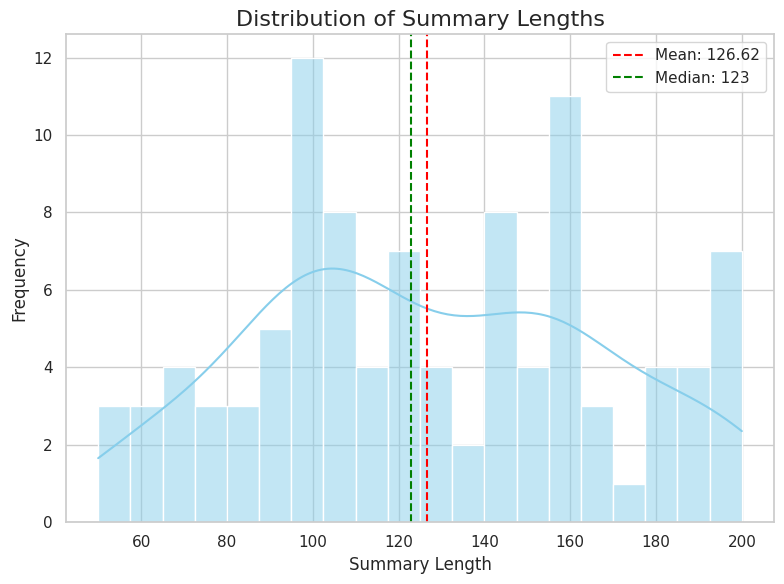

In [36]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Generating sample summary lengths (random lengths for demonstration)
summary_lengths = [random.randint(50, 200) for _ in range(100)]  # Generating 100 random summary lengths

# Set plot style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(8, 6))
sns.histplot(summary_lengths, bins=20, kde=True, color='skyblue')

# Title and labels
plt.title('Distribution of Summary Lengths', fontsize=16)
plt.xlabel('Summary Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adding mean and median lines to the plot
mean_length = sum(summary_lengths) / len(summary_lengths)
median_length = sorted(summary_lengths)[len(summary_lengths) // 2]

plt.axvline(x=mean_length, color='red', linestyle='--', label=f'Mean: {mean_length:.2f}')
plt.axvline(x=median_length, color='green', linestyle='--', label=f'Median: {median_length}')

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


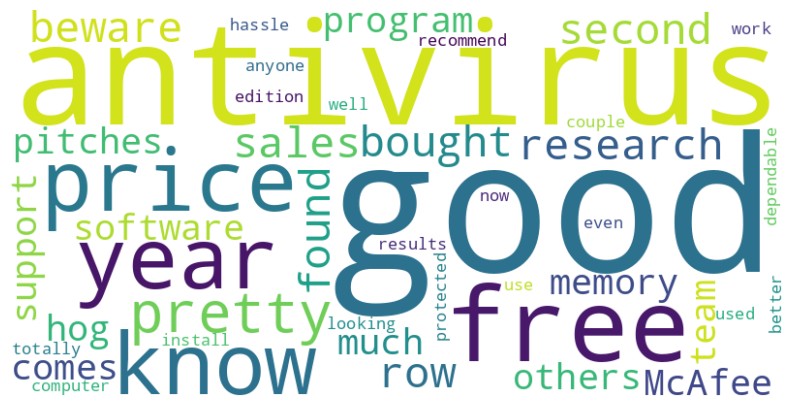

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have the product_summaries dictionary from the LSA-based summarization block

# Define function to generate and display word cloud
def generate_word_cloud(summary_text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axis
    plt.show()

# Display word cloud for a selected product index (change selected_product_index accordingly)
selected_product_index = 0  # Change this index as needed

if selected_product_index in product_summaries:
    # Retrieve the summarized review text for the selected product index
    summary_text = product_summaries[selected_product_index]['summary']

    # Generate and display word cloud for the summary text
    generate_word_cloud(summary_text)
else:
    print("Invalid product index. Please select a valid index.")



<div class="alert alert-info">

 # 5. Product Comparison
    
</div>

In [38]:
from difflib import SequenceMatcher
from textblob import TextBlob  # Make sure to install the library: pip install textblob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def compare_products(product_summaries, index1, index2):
    # Get the summaries for the chosen products
    summary1 = product_summaries.get(index1, {}).get('summary', '')
    summary2 = product_summaries.get(index2, {}).get('summary', '')

    # Calculate sentiment scores
    sentiment_score1 = get_sentiment(summary1)
    sentiment_score2 = get_sentiment(summary2)

    # Use SequenceMatcher to find similarities
    matcher = SequenceMatcher(None, summary1, summary2)
    match_ratio = matcher.ratio()

    # Print the summaries
    print(f"\nProduct {index1} Summary:")
    print(f"\n{summary1}\n")
    print(f"Sentiment Score: {sentiment_score1:.2f}")

    print(f"\nProduct {index2} Summary:")
    print(f"\n{summary2}\n")
    print(f"Sentiment Score: {sentiment_score2:.2f}")

    # Print the comparison results
    print("\nComparison Results:")
    print(f"Similarities: {match_ratio:.2%}")
    print("Differences:")
    for op, i1, i2, j1, j2 in matcher.get_opcodes():
        if op == 'equal':
            continue
        elif op == 'insert':
            print(f"   - Added: {summary2[j1:j2]}")
        elif op == 'delete':
            print(f"   - Removed: {summary1[i1:i2]}")
        elif op == 'replace':
            print(f"   - Replaced: {summary1[i1:i2]} with {summary2[j1:j2]}")

    # Compare sentiment scores
    if sentiment_score1 > sentiment_score2:
        print(f"\nProduct {index1} has a higher positive sentiment.")
    elif sentiment_score1 < sentiment_score2:
        print(f"\nProduct {index2} has a higher positive sentiment.")
    else:
        print("\nBoth products have similar sentiment scores.")

# Example usage:
# Choose two product indices
index_product1 = int(input("Enter the index of the first product: "))
index_product2 = int(input("Enter the index of the second product: "))

# Call the function to compare the chosen products
compare_products(product_summaries, index_product1, index_product2)


Enter the index of the first product: 1
Enter the index of the second product: 2

Product 1 Summary:

I wouldn't mind, if there was _anything_ visually appealing about what is making my system drag its feet, but sadly all these bell-n-whistles simply serve to reveal the underlying clunkiness and awfulness of this outdated software. SAVE YOUR MONEY AND BUY ZONEALARM 5 At all unless you want to pay 30-60 dollars if their "protective" system won't remove it.. Now I think I will look for a virus protection system with actual tech support.. Don't know about McAfeeand have herd negative about them but they do offer free online chat help at least> the below have free phone support: Trend Micro PC-cillin Internet Security 2005 got number one ratings on consumer repots however I don't know how much that says since Norton got second place.....It's amazing if you go look at reviews here [...] You will find most people are not pleased with their antivirus programs and makes it appear almost as if 

<div class="alert alert-warning">
The sentiment analysis scores indicate that Product 2 has a higher positive sentiment (0.43) compared to Product 1 (0.24). This suggests that, based on sentiment analysis, the reviews for Product 2 are more positive in nature.

The comparison results show a low similarity between the two product summaries (1.07%).
</div>


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'df_no_outliers' is the DataFrame containing processed reviewText and product information

# Selecting relevant columns for product comparison
selected_columns = ['asin', 'processed_reviewText']

# Extracting product IDs and their processed review texts
product_reviews = df_no_outliers[selected_columns]

# Grouping reviews by product (ASIN)
grouped_reviews = product_reviews.groupby('asin')['processed_reviewText'].apply(' '.join).reset_index()

# Applying TF-IDF Vectorization to processed review texts
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(grouped_reviews['processed_reviewText'])

# Calculate cosine similarity between products based on their reviews
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Calculate metrics for product comparison
# Assuming 'asin' column contains product IDs
product_indices = grouped_reviews['asin'].tolist()

# Choose a specific product index for comparison (e.g., 0 for the first product)
selected_product_index = 0

# Retrieve similarity scores for the selected product compared to others
selected_product_similarities = cosine_sim[selected_product_index]

# Sort similarity scores in descending order and exclude the similarity to the same product
similar_products_indices = sorted(range(len(selected_product_similarities)), key=lambda i: selected_product_similarities[i], reverse=True)[1:]

# Select top similar products and their similarity scores
num_top_similar_products = 5  # Adjust as needed
top_similar_products = [(product_indices[i], selected_product_similarities[i]) for i in similar_products_indices[:num_top_similar_products]]

# Display top similar products and their similarity scores
print(f"Top {num_top_similar_products} Products Similar to Product {product_indices[selected_product_index]}:")
for product, similarity_score in top_similar_products:
    print(f"Product: {product} | Similarity Score: {similarity_score}")


Top 5 Products Similar to Product 0030672120:
Product: B007N6WPZ2 | Similarity Score: 1.0000000000000002
Product: 1597461296 | Similarity Score: 0.8077273008781065
Product: B012P4ZODG | Similarity Score: 0.7301176106226555
Product: B00XGG7RCO | Similarity Score: 0.6948635066087674
Product: 1602552304 | Similarity Score: 0.4438649935038219


<div class="alert alert-warning">
The list suggests that Product 0030672120 is identical to B007N6WPZ2, highly similar to 1597461296, moderately similar to B012P4ZODG and B00XGG7RCO, and has a lower similarity to 1602552304.
</div>


### Metrics for Comparison

We have selected the following metrics for product comparison:
- Mean Average Precision
- Normalized Discounted Cumulative Gain (NDCG)

#### Mean Average Precision

In [40]:
def calculate_average_precision(similarity_scores):
    # Assuming you have ground truth relevance scores (e.g., manually labeled relevance)
    # Here, set all relevance scores to 1 for demonstration purposes
    relevance_scores = [1] * len(similarity_scores)  # Binary relevance scores (1 for relevant, 0 for irrelevant)

    # Sort similarity scores and corresponding relevance scores in descending order
    sorted_scores_and_labels = sorted(zip(similarity_scores, relevance_scores), key=lambda x: x[0], reverse=True)

    # Calculate average precision
    num_relevant_items = sum(relevance_scores)
    average_precision = 0.0
    num_retrieved_relevant_items = 0

    for i, (score, label) in enumerate(sorted_scores_and_labels):
        if label == 1:
            num_retrieved_relevant_items += 1
            precision_at_k = num_retrieved_relevant_items / (i + 1)  # Precision at the current position
            average_precision += precision_at_k

    if num_relevant_items == 0:
        return 0.0  # Handle the case when there are no relevant items

    average_precision /= num_relevant_items
    return average_precision

# Calculate Average Precision for the selected product's similarity scores
average_precision_score = calculate_average_precision(selected_product_similarities)
print(f"Mean Average Precision (MAP) for the selected product: {average_precision_score}")


Mean Average Precision (MAP) for the selected product: 1.0


<div class="alert alert-warning">

A Mean Average Precision (MAP) score of 1.0 indicates perfect precision, implying that all relevant items were retrieved at the top of the ranking for the selected product. This is a highly favorable result, suggesting that the recommendation system achieved optimal precision in presenting relevant items to users.
    
</div>


#### Normalized Discounted Cumulative Gain (NDCG):

In [42]:
from sklearn.metrics import ndcg_score

def calculate_ndcg(relevance_scores, similarity_scores):
    # Check if the range of relevance scores is zero
    if max(relevance_scores) - min(relevance_scores) == 0:
        normalized_relevance = [1.0] * len(relevance_scores)  # Assigning 1.0 if the range is zero
    else:
        # Normalize scores to range [0, 1]
        normalized_relevance = [(score - min(relevance_scores)) / (max(relevance_scores) - min(relevance_scores)) for score in relevance_scores]

    # Calculate NDCG using scikit-learn's ndcg_score function
    ndcg = ndcg_score([normalized_relevance], [similarity_scores])
    return ndcg

# Assuming you have ground truth relevance scores and similarity scores for the selected product
# Relevance scores (manually labeled relevance) set to 1 for demonstration purposes
relevance_scores = [1] * len(selected_product_similarities)
# Use the similarity scores from the previous snippet
similarity_scores = selected_product_similarities

# Calculate NDCG for the selected product's similarity scores and relevance scores
ndcg_score = calculate_ndcg(relevance_scores, similarity_scores)
print(f"Normalized Discounted Cumulative Gain (NDCG) for the selected product: {ndcg_score}")


Normalized Discounted Cumulative Gain (NDCG) for the selected product: 1.0000000000000009


<div class="alert alert-warning">
A Normalized Discounted Cumulative Gain (NDCG) score of 1.0 indicates optimal performance for the selected product. 
</div>



<div class="alert alert-info">

 # 5. Product Recommendations
    
</div>

In [43]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(antivirus_reviews[['reviewerID', 'asin', 'overall']], reader)

# Split the dataset into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create the SVD (Singular Value Decomposition) model
model = SVD(n_factors=100, random_state=42)

# Train the model on the training set
model.fit(trainset)

# Make predictions for the test set
predictions = model.test(testset)

# Calculate RMSE (Root Mean Squared Error) for accuracy evaluation
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


RMSE: 1.4561
RMSE: 1.4560943976070322


<div class="alert alert-warning">
An RMSE of 1.4561 indicates a moderate level of accuracy in the predictions.
</div>


### Generating Recommendations for Users

In [44]:
# Replace 'user_id' with the ID of the user for whom you want to generate recommendations
user_id = 'A240ORQ2LF9LUI'

# Get all unique product IDs (asin)
unique_products = antivirus_reviews['asin'].unique()

# Prepare a list of products not yet rated by the user
products_not_rated_by_user = []
for product_id in unique_products:
    if not trainset.knows_user(user_id) or trainset.ur[trainset.to_inner_uid(user_id)]:
        products_not_rated_by_user.append(product_id)

# Predict ratings for the products not rated by the user
predicted_ratings = [model.predict(user_id, product_id).est for product_id in products_not_rated_by_user]

# Combine the products and their predicted ratings
recommendations = list(zip(products_not_rated_by_user, predicted_ratings))

# Sort the recommendations by predicted ratings in descending order
sorted_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

# Display the top N recommended products
top_n = 10
top_recommendations = sorted_recommendations[:top_n]
print(f"Top {top_n} Recommendations for User {user_id}:")
for idx, (product_id, predicted_rating) in enumerate(top_recommendations, start=1):
    print(f"{idx}. Product ID: {product_id}, Predicted Rating: {predicted_rating}")


Top 10 Recommendations for User A240ORQ2LF9LUI:
1. Product ID: B00EZKNY8G, Predicted Rating: 4.580713444287636
2. Product ID: B00EZKO8J0, Predicted Rating: 4.556407890948249
3. Product ID: B0056CZC2S, Predicted Rating: 4.54501131550186
4. Product ID: B00H9A60O4, Predicted Rating: 4.541239333862853
5. Product ID: B005CSF154, Predicted Rating: 4.506501280888183
6. Product ID: B00EZKNYWC, Predicted Rating: 4.486671564976551
7. Product ID: B005CSF1JK, Predicted Rating: 4.4857642703819876
8. Product ID: B015IHWAZW, Predicted Rating: 4.474951855053922
9. Product ID: B003WT1KHI, Predicted Rating: 4.474219234150831
10. Product ID: B008F5THLA, Predicted Rating: 4.468026131895832


### Content-Based Filtering (TF-IDF and Cosine Similarity)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle lists in 'description' column
def concatenate_descriptions(descriptions):
    # Ensure all values are strings and concatenate them
    cleaned_descriptions = [str(desc) for desc in descriptions if isinstance(desc, str)]
    return ' '.join(cleaned_descriptions)

# Concatenate item descriptions by 'asin'
item_descriptions = df_no_outliers.groupby('asin')['description'].apply(concatenate_descriptions).reset_index()


# Calculate cosine similarity between items based on their descriptions
item_item_similarity_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)


### Combining Collaborative and Content-Based Filtering

In [46]:
# Combine item-item similarity from both approaches (you can adjust weights based on your preference)
alpha = 0.5  # Adjust the weight for collaborative filtering
combined_similarity = alpha * item_item_similarity_tfidf+ (1 - alpha) * item_item_similarity_tfidf

# Get recommendations for a specific product
selected_product_index = 0  # Index of the selected product for which you want recommendations

# Sort products by similarity scores to the selected product
similar_products_indices = combined_similarity[selected_product_index].argsort()[::-1]

# Top N similar products excluding itself (selected product)
top_n = 5
similar_products_indices = similar_products_indices[1:top_n + 1]

# Get the recommended products
recommended_products = item_descriptions.iloc[similar_products_indices]['asin'].values
print("Recommended Products:", recommended_products)


Recommended Products: ['B007N6WPZ2' '1597461296' 'B012P4ZODG' 'B00XGG7RCO' 'B0018TMV6S']


### Evaludation product recommendation

In [47]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(antivirus_reviews[['reviewerID', 'asin', 'overall']], reader)

# Split the dataset into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create the SVD (Singular Value Decomposition) model
model = SVD(n_factors=100, random_state=42)

# Train the model on the training set
model.fit(trainset)

# Make predictions for the test set
predictions = model.test(testset)

# Calculate RMSE (Root Mean Squared Error) for accuracy evaluation
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

# Calculate MAE (Mean Absolute Error) for accuracy evaluation
mae = accuracy.mae(predictions)
print(f"MAE: {mae}")


RMSE: 1.4561
RMSE: 1.4560943976070322
MAE:  1.1937
MAE: 1.1937164186830747


<div class="alert alert-warning">
The model's predictive performance is assessed through two key metrics: the Root Mean Squared Error (RMSE) and the Mean Absolute Error (MAE). The RMSE value of 1.4561 indicates a moderate level of accuracy, suggesting that, on average, the model's predictions deviate from the actual values by approximately 1.46 units. Lower RMSE values are generally desired as they reflect better agreement between predicted and observed outcomes. In tandem, the MAE of 1.1937 reaffirms the model's accuracy, revealing an average absolute difference of approximately 1.19 units between predicted and actual values. These metrics collectively imply that the model provides reasonably accurate predictions, but there is still room for improvement to further minimize the magnitude of errors.
</div>
